# Problem 1 

During the lecture you worked with pipelines in SciKit-Learn to perform feature transformation before classification/regression using a pipeline. In this problem, you will look at another scaling method in a 2D regression context.

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:
Sklearn Models (no scaling): Print Train and Test MSE
- Linear Regression (input degree 8 features)
- SVR, C = 1000
- KNN, K = 4
- Random Forest, 100 estimators of max depth 10  

Sklearn Pipeline (scaling + model): Print Train and Test MSE
- Linear Regression (input degree 8 features)
- SVR, C = 1000
- KNN, K = 4
- Random Forest, 100 estimators of max depth 10  

Plots
- 1x5 subplot showing model predictions on unscaled features, next to ground truth
- 1x5 subplot showing pipeline predictions with features scaled, next to ground truth

Questions
- Respond to the prompts at the end

In [2]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot(X, y, title=""):
    plt.scatter(X[:,0],X[:,1],c=y,cmap="jet")
    plt.colorbar(orientation="horizontal")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title(title)

## Load the data

Complete the loading process below by inputting the path to the data file "w6-p1-data.npy"

Training data is in `X_train` and `y_train`.
Testing data is in `X_test` and `y_test`.

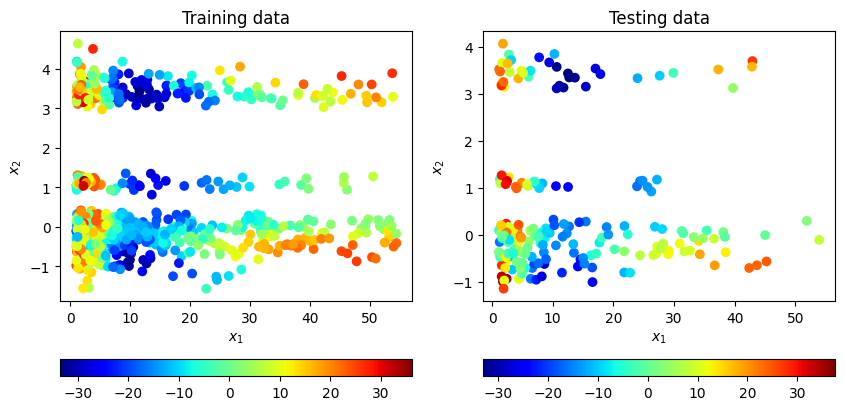

In [3]:
# YOUR CODE GOES HERE
# Define path
path = r"data/w6-p1-data.npy"

data = np.load(path)
X, y = data[:,:2], data[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=int(0.8*len(y)),random_state=0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot(X_train, y_train, "Training data")
plt.subplot(1,2,2)
plot(X_test, y_test, "Testing data")
plt.show()

## Models (no input scaling)
Fit 4 models to the training data:
- `LinearRegression()`. This should be a pipeline whose first step is `PolynomialFeatures()` with degree 7.
- `SVR()` with C = 1000 and "rbf" kernel
- `KNeighborsRegressor()` using 4 nearest neighbors
- `RandomForestRegressor()` with 100 estimators of max depth 10

Print the Train and Test MSE for each

In [26]:
model_names = ["LSR", "SVR", "KNN", "RF"]

# YOUR CODE GOES HERE
model = Pipeline([('poly',PolynomialFeatures(degree=7)),
                  ('linear',LinearRegression())
                  ])
model.fit(X_train,y_train)
linear_train = model.predict(X_train)
linear_test = model.predict(X_test)
mse_linear_train = mean_squared_error(y_train,linear_train)
mse_linear_test = mean_squared_error(y_test,linear_test)
print("Linear_train:",mse_linear_train)
print("Linear_test:",mse_linear_test)

model = SVR(C=1000,kernel='rbf')
model.fit(X_train,y_train)
SVR_train = model.predict(X_train)
SVR_test = model.predict(X_test)
mse_SVR_train = mean_squared_error(y_train,SVR_train)
mse_SVR_test = mean_squared_error(y_test,SVR_test)
print("SVR_train:",mse_SVR_train)
print("SVR_test:",mse_SVR_test)

model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train,y_train)
KNN_train = model.predict(X_train)
KNN_test = model.predict(X_test)
mse_KNN_train = mean_squared_error(y_train,KNN_train)
mse_KNN_test = mean_squared_error(y_test,KNN_test)
print("KNN_train:",mse_KNN_train)
print("KNN_test:",mse_KNN_test)

model = RandomForestRegressor(max_depth=10)
model.fit(X_train,y_train)
rf_train = model.predict(X_train)
rf_test = model.predict(X_test)
mse_rf_train = mean_squared_error(y_train,rf_train)
mse_rf_test = mean_squared_error(y_test,rf_test)
print("rf_train:",mse_rf_train)
print("rf_test:",mse_rf_test)

Linear_train: 50.86638998029529
Linear_test: 57.2864277523449
SVR_train: 82.04352603565974
SVR_test: 98.63319719407525
KNN_train: 26.856498566141628
KNN_test: 47.63617328402055
rf_train: 5.886004696040535
rf_test: 25.067041685178502


## Visualizing the predictions
Plot the predictions of each method on the testing data in a 1x5 subplot structure, with the ground truth values as the leftmost subplot.

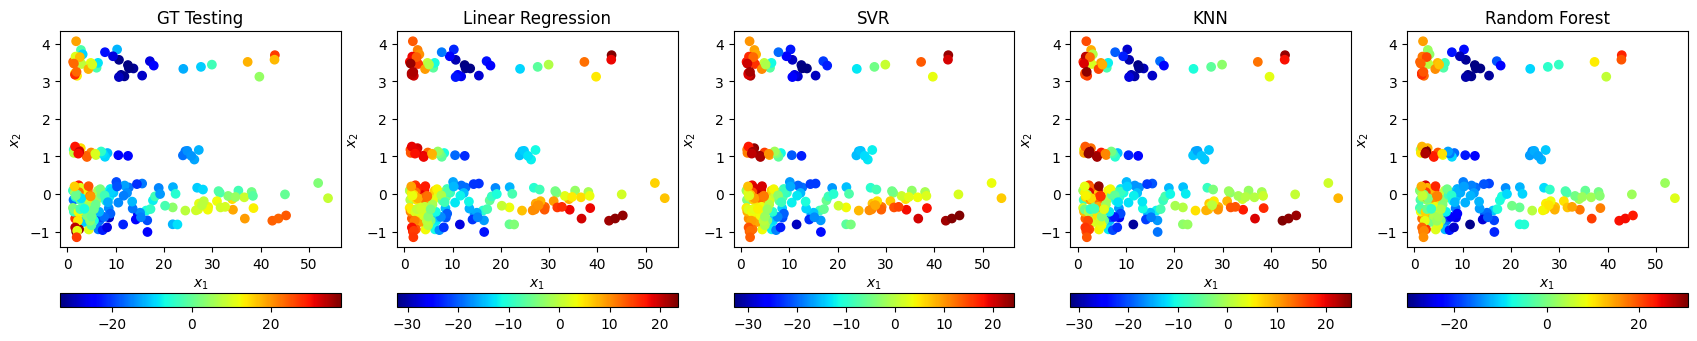

In [46]:
plt.figure(figsize=(21,4))
plt.subplot(1,5,1)
plot(X_test, y_test, "GT Testing")

# YOUR CODE GOES HERE
plt.subplot(1, 5, 2)
plot(X_test, linear_test, "Linear Regression")
plt.title("Linear Regression")

plt.subplot(1, 5, 3)
plot(X_test, SVR_test,"SVR")
plt.title("SVR")

plt.subplot(1, 5, 4)
plot(X_test, KNN_test, "KNN")
plt.title("KNN")
plt.subplot(1, 5, 5)
plot(X_test, rf_test,"Random Forest")
plt.title("Random Forest")

plt.show()


## Quantile Scaling

A `QuantileTransformer()` can transform the input data in a way that attempts to match a given distribution (uniform distribution by default).  
- Create a quantile scaler with `n_quantiles = 800`.
- Then, create a pipeline for each of the 4 types of models used earlier
- Fit each pipeline to the training data, and again print the train and test MSE

In [44]:
pipeline_names = ["LSR, scaled", "SVR, scaled", "KNN, scaled", "RF, scaled"]

# YOUR CODE GOES HERE

model = Pipeline([('scaler',QuantileTransformer(n_quantiles=800)),
                  ('poly',PolynomialFeatures(degree=7)),
                  ('linear',LinearRegression())
                  ])
model.fit(X_train,y_train)
linear_train = model.predict(X_train)
linear_test = model.predict(X_test)
mse_linear_train = mean_squared_error(y_train,linear_train)
mse_linear_test = mean_squared_error(y_test,linear_test)
print("Linear_train:",mse_linear_train)
print("Linear_test:",mse_linear_test)

model = Pipeline([('scaler',QuantileTransformer(n_quantiles=800)),
                  ('SVR',SVR(C=1000,kernel='rbf'))
                  ])
model.fit(X_train,y_train)
SVR_train = model.predict(X_train)
SVR_test = model.predict(X_test)
mse_SVR_train = mean_squared_error(y_train,SVR_train)
mse_SVR_test = mean_squared_error(y_test,SVR_test)
print("SVR_train:",mse_SVR_train)
print("SVR_test:",mse_SVR_test)

model = Pipeline([('scaler',QuantileTransformer(n_quantiles=800)),
                  ('KNN',KNeighborsRegressor(n_neighbors=4))
                  ])
model.fit(X_train,y_train)
KNN_train = model.predict(X_train)
KNN_test = model.predict(X_test)
mse_KNN_train = mean_squared_error(y_train,KNN_train)
mse_KNN_test = mean_squared_error(y_test,KNN_test)
print("KNN_train:",mse_KNN_train)
print("KNN_test:",mse_KNN_test)

model = Pipeline([('scaler',QuantileTransformer(n_quantiles=800)),
                  ('rf',RandomForestRegressor(max_depth=10))
                  ])
model.fit(X_train,y_train)
rf_train = model.predict(X_train)
rf_test = model.predict(X_test)
mse_rf_train = mean_squared_error(y_train,rf_train)
mse_rf_test = mean_squared_error(y_test,rf_test)
print("rf_train:",mse_rf_train)
print("rf_test:",mse_rf_test)


Linear_train: 39.52893428670628
Linear_test: 43.2036349225095
SVR_train: 41.03425800595977
SVR_test: 43.017915737897745
KNN_train: 19.687691313922564
KNN_test: 36.397038931930005
rf_train: 5.929603361123817
rf_test: 24.31405312970533


## Visualization with scaled input
As before, plot the predictions of each *scaled* method on the testing data in a 1x5 subplot structure, with the ground truth values as the leftmost subplot.  

This time, for each plot, show the scaled data points instead of the original data. You can do this by calling `.transform()` on your quantile scaler. The scaled points should appear to follow a uniform distribution.

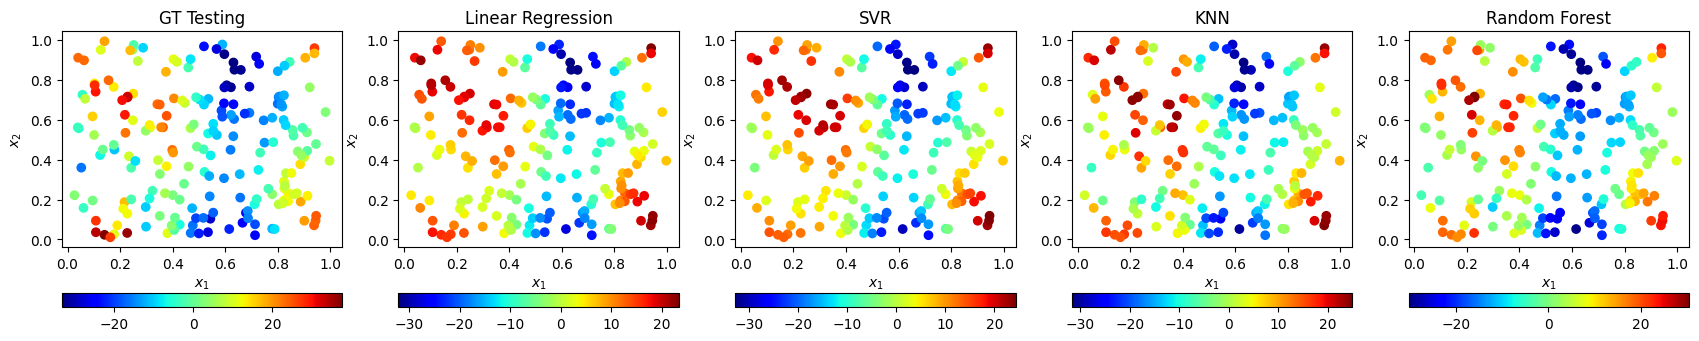

In [52]:
# YOUR CODE GOES HERE
plt.figure(figsize=(21,4))
X_test = model.named_steps['scaler'].transform(X_test)
plt.subplot(1,5,1)
plot(X_test, y_test, "GT Testing")

# YOUR CODE GOES HERE
plt.subplot(1, 5, 2)
plot(X_test, linear_test, "Linear Regression")
plt.title("Linear Regression")

plt.subplot(1, 5, 3)
plot(X_test, SVR_test,"SVR")
plt.title("SVR")

plt.subplot(1, 5, 4)
plot(X_test, KNN_test, "KNN")
plt.title("KNN")
plt.subplot(1, 5, 5)
plot(X_test, rf_test,"Random Forest")
plt.title("Random Forest")

plt.show()


## Questions

1. Without transforming the input data, which model performed the best on test data? What about after scaling?  


2. For each method, say whether scaling the input improved or worsened, how extreme the change was, and why you think this is.  


1. Random Forest performs the best as it is the closest to the ground truth
2. 